In [86]:
#encoding. word encodig
import codecs
#log events for libraries
import logging
#concurrency
import multiprocessing
#dealing with operating system , like reading file
import os
#regular expressions
import re

In [87]:
import nltk
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [88]:
import gensim.models.word2vec as w2v
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'seed']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [89]:
#only first time
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\indra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\indra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [90]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [91]:
book_filename = 'tweets.txt'
corpus_raw = u""
with codecs.open(book_filename, "r", "utf-8") as book_file:
    corpus_raw += book_file.read()

In [92]:
raw_sentences = tokenizer.tokenize(corpus_raw)
raw_sentences = [raw_sentence.lower() for raw_sentence in raw_sentences]

In [93]:
#convert into a list of words
#rtemove unnnecessary,, split into words, no hyphens
#list of words
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [94]:
#sentence where each word is tokenized
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [95]:
print(raw_sentences[3])
print(sentence_to_wordlist(raw_sentences[3]))

https:…
cordarrelle patterson scored his sixth career rushing td of at least 30 yards.
['https', 'cordarrelle', 'patterson', 'scored', 'his', 'sixth', 'career', 'rushing', 'td', 'of', 'at', 'least', 'yards']


In [96]:
token_count = sum([len(sentence) for sentence in sentences])
print("The corpus contains {0:,} tokens".format(token_count))

The corpus contains 1,781 tokens


In [97]:
#ONCE we have vectors
#step 3 - build model
#3 main tasks that vectors help with
#DISTANCE, SIMILARITY, RANKING

# Dimensionality of the resulting word vectors.
#more dimensions, more computationally expensive to train
#but also more accurate
#more dimensions = more generalized
num_features = 300
# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging
seed = 1

In [98]:
IAB2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [99]:
IAB2vec.build_vocab(sentences)

In [100]:
print("Word2Vec vocabulary length:", len(IAB2vec.wv.vocab))

Word2Vec vocabulary length: 118


In [101]:
#Start training, this might take a minute or two...
#IAB2vec.train(sentences)
IAB2vec.train(sentences, total_examples=IAB2vec.corpus_count, epochs=IAB2vec.iter)


2042

In [102]:
#Save to file, can be useful later
if not os.path.exists("trained"):
    os.makedirs("trained")

In [54]:
IAB2vec.save(os.path.join("trained", "IAB2vec.w2v"))

In [103]:
IAB2vec = w2v.Word2Vec.load(os.path.join("trained", "IAB2vec.w2v"))

In [104]:
#my video - how to visualize a dataset easily
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [105]:
all_word_vectors_matrix = IAB2vec.wv.syn0

In [106]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [107]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[IAB2vec.wv.vocab[word].index])
            for word in IAB2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [108]:
points.head(10)

,word,x,y
0,Pepsi,42.220166,26.442224
1,don,-16.065538,-59.529448
2,t,17.553491,39.917342
3,Coke,-44.501445,-14.979639
4,https,53.568992,6.808227
5,co,29.000475,17.469147
6,RT,-68.118624,-17.318264
7,to,-30.056080,-6.874939
8,me,1.113109,-47.723476
9,in,55.907763,-12.516624


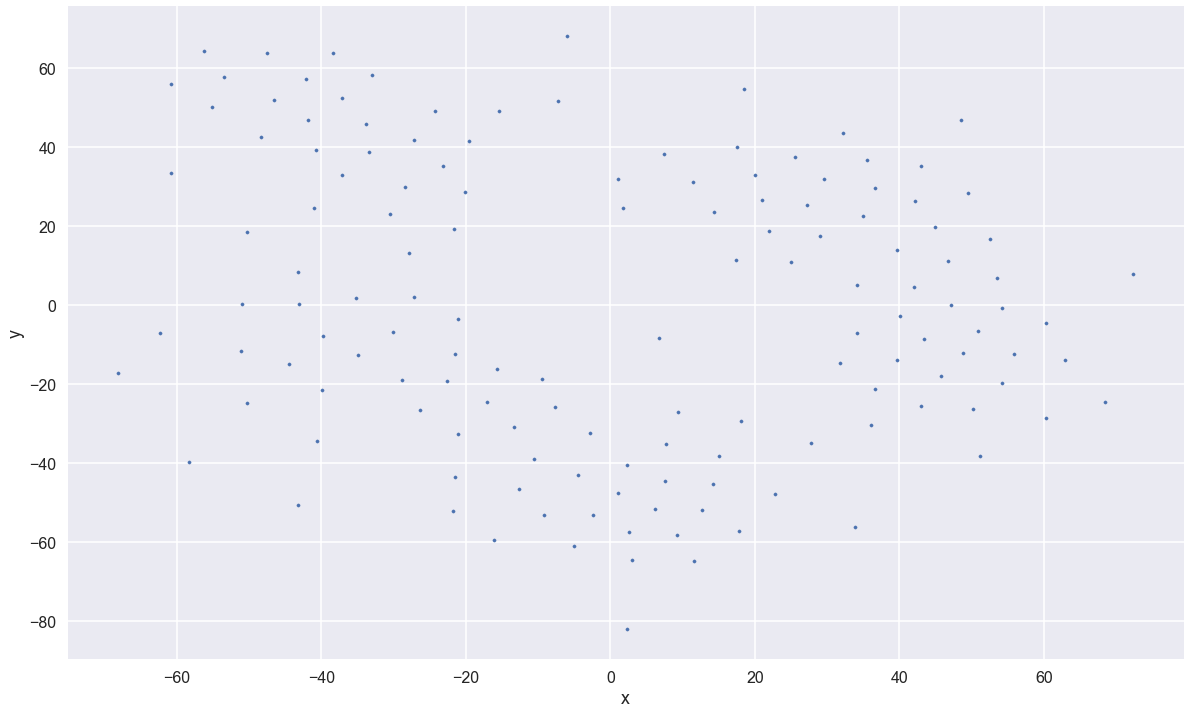

In [68]:
sns.set_context("poster")
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [74]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

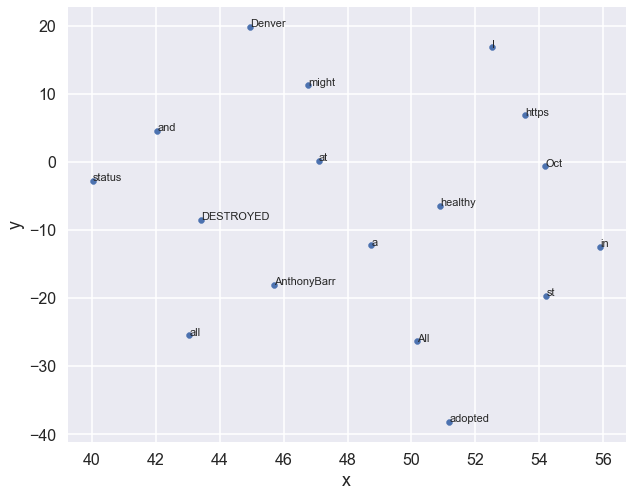

In [73]:
plot_region(x_bounds=(40.0, 60.0), y_bounds=(-40.0, 20.0))

In [78]:
IAB2vec.most_similar('pepsi')

[('VonKloss', 0.9995442628860474),
 ('USA', 0.999492347240448),
 ('co', 0.9994672536849976),
 ('RT', 0.999439537525177),
 ('kewilpee', 0.9994373917579651),
 ('t', 0.9994148015975952),
 ('PEPSI', 0.9993892312049866),
 ('daWorld', 0.9993869066238403),
 ('for', 0.9993793964385986),
 ('adopted', 0.9993667602539062)]

In [79]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = IAB2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [84]:
nearest_similarity_cosmul('pepsi', 'USA', 'coke')


pepsi is related to USA, as co is related to coke


'co'